# **PES 2019 Condition Results**
## Summary:
In our analysis of the game PES 2019 when simulated within online events it is often questioned how large of an impact conditions play between teams. Within this project the impact of conditions will be explored using analytics to determine how great, if at all the impact of conditions has upon the results of games simulated on random conditions to give better information to those who watch and gamble on such simulations along with those who create teams. Within the analysis it is found that there is insufficient evidence to surpass a confidence interval of .03, meaning that it cannot be reasoned that conditions play any significant role beyond statistical noise regardless of how one is to organize and analyze condition’s impacts on results. 
## Introduction: 
To begin with PES 2019 is a soccer game for the PC, to which has a thriving community of players on its platform. Similar to this there is a large community that modifies and uses the PES 2019 simulation mode to stream games where modified teams play against each other in online tournaments. Many any activities ranging from gambling to attempting to win these simulations take place with these games AI simulated games. One question that has always been up in the air has been how greatly conditions, represented in the game by an arrow-colored purple, blue, green, orange, and red, impact the results of a game. It is common knowledge that purple conditions somewhat negatively impact a team, and that red conditions very positively impact a team, for when one has set the team entirely to red conditions against a similar team in purple conditions the red team will win almost every time; however, the question remains, how greatly does this impact teams that play in the competitive setting where random conditions are used? This leads us to ask our question to which will be analyzed throughout this project:
#### **Question:** Do conditions mater in a significant or impactful way in a game in 2019 PES?
For us to answer this question we will do the following: <br>
First, we will collect data from the 4CC wiki with respect to group stage games that can be impactful to our question. <br>
Second, we will manipulate the data we have collected such that we can perform analytic regression analysis on our data. <br>
Third we will perform regressions on the data to see if we can reject the null and if not, how impactful conditions really are with regard to game performance. 
## Part 1 Conditions by Player
First look at the question will first be viewed with regard to what impact each player has upon the results as the unit of analysis. That means for each and every player's condition will be the dependent variable. Similarly within this portion it will also be analyzed by breaking down each player by what position they play within their team and how the conditions impact those players' results.
## Data Gathering:
So the first thing we need to do is write a quick script to rip the data from the wiki and give us some data to work with. For the purposes of this I'll also save it on my computer as a .csv so that I can also look at it in Tableau before I heavily manipulate the data.<br>
<br>
<small>**If you want to get the data as well just modify the directory for where to save it based upon your own computer.**</small>

In [1]:
d = "C:\\Users\\???\\Desktop\\4cc_data.csv"
d1 = "C:\\Users\\???\\Desktop\\4cc_datateam.csv"

In [2]:
from urllib.request import urlopen 
import re
from urllib.request import urlopen
import io
with open (d, 'w') as fh: ##setting up the .csv
		fh.write('#,CupandGroup,Match,Team,Player,Position,Condition,Score,Result\n')

def game_score(html):  ##finding the score of the game
	return html[html.find('&#8211;')-1] + '-' + html[html.find('&#8211;')+len('&#8211;')]
def p_name(html): ##finding the player name
	return re.sub("<.*?>", "", ''.join(html[i] for i in range (0, html.find('/tr>') + 4))).replace("\n", '')
def p_con(html):  ##finding the player condition
	red = html.find('Cond-very good')
	orange = html.find('Cond-good')
	green = html.find('Cond-okay')
	blue = html.find('Cond-poor')
	purple = html.find('Cond-very poor') 
	con_l = [red, orange, green, blue, purple]
	con_l = min([i for i in con_l if i >= 0])
	if red == con_l:
		return('red')
	elif orange == con_l:
		return('orange')
	elif green == con_l:
		return('green')
	elif blue == con_l:
		return('blue')
	elif purple == con_l:
		return('purple')
def p_pos(html):
	GK = html.find('GK')
	LB = html.find('LB')
	CB = html.find('CB')
	RB = html.find('RB')
	DMF = html.find('DMF')
	CMF = html.find('CMF')
	RMF = html.find('RMF')
	LMF = html.find('LMF')
	AMF = html.find('AMF')
	SS = html.find('SS')
	RWF = html.find('RWF')
	LWF = html.find('LWF')
	CF = html.find('CF')
	pos_l = [GK, LB, CB, RB, DMF, CMF, RMF, LMF, AMF, SS, RWF, LWF, CF]
	pos_l = min([i for i in pos_l if i >= 0])
	if GK == pos_l:
		return ('GK')
	elif LB == pos_l:
		return ('LB')
	elif CB == pos_l:
		return ('CB')
	elif RB == pos_l:
		return ('RB')
	elif DMF == pos_l:
		return ('DMF')
	elif CMF == pos_l:
		return ('CMF')
	elif RMF == pos_l:
		return ('RMF')
	elif LMF == pos_l:
		return ('LMF')
	elif AMF == pos_l:
		return ('AMF')
	elif SS == pos_l:
		return ('SS')
	elif RWF == pos_l:
		return ('RWF')
	elif LWF == pos_l:
		return ('LWF')
	elif CF == pos_l:
		return ('CF')
def match(html):  ##seing if the match was a win or a loss.
	if html.find(' v ') == -1:
		return 1
	else:
		for i in range (0, 20):
			if html[html.find(' v ') - 2 - i] == '/':
				start = (html.find(' v ') - 2 - i)
				break
		for i in range (0, 20):
			if html[html.find(' v ') + 4 + i] == '/':
				end = (html.find(' v ') + 4 + i)
				break
		return ''.join(html[i] for i in range (start, end + 1))
def team_H(game):  ##findign the home team
		return game[0:game[1:-1].find('/')+2]
def team_A(game): ##finding the away team
		return game[::-1][0:game[::-1][1:-1].find('/')+2][::-1]
def winloss(score):  ##getting the goal difference between the team that won and that loss.
	if score[0] > score[-1:]:
		return 'Win'
	elif score[0] < score[-1:]:
		return 'Lose'
	else:
		return 'Draw'
number = 0  ##count number
AtH = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']  ##for irrative game list so that I don't have to write out by hand each group
games_list = ['https://implyingrigged.info/wiki/2020_4chan_Spring_Babby_Cup_Qualifiers_Group_A', 'https://implyingrigged.info/wiki/2020_4chan_Spring_Babby_Cup_Qualifiers_Group_B', 'https://implyingrigged.info/wiki/2020_4chan_Autumn_Babby_Cup_Qualifiers_Group_A', 'https://implyingrigged.info/wiki/2020_4chan_Autumn_Babby_Cup_Qualifiers_Group_B']
for i in AtH:
	games_list.append('https://implyingrigged.info/wiki/2020_4chan_Autumn_Babby_Cup_Group_' + i)
	games_list.append('https://implyingrigged.info/wiki/2020_4chan_Summer_Cup_Group_' + i)
	games_list.append('https://implyingrigged.info/wiki/2020_4chan_Spring_Babby_Cup_Group_' + i)

for j in games_list: ##starting to itterate through each wiki page's data
	url = j
	page = urlopen(url)
	html_bytes = page.read()
	html = html_bytes.decode("utf-8")
	title = html[(html.find("<title>") + len("<title>")):html.find("</title>")][:-14] ##getting the title of the wiki

	while match(html) != 1:  ##while there are matches continue to sort through the page

		game = match(html)  ##first record the match
		html = ''.join(html[i] for i in range (html.find('Stadium:'), len(html)))  ##then delete everything up to where it lists the stadium
		score = game_score(html)  ##then recrod the score
		html = ''.join(html[i] for i in range (html.find('Assists'), len(html))) ##then delete everything up to where it lists how many Assists there are
		team_0 = team_H(game) ##record home team
		team_1 = team_A(game) ##record away team
		html = ''.join(html[i] for i in range (html.find('Kit:'), len(html))) ##then delete everything up to where it says kit 
		html = ''.join(html[i] for i in range (html.find('r>') + 2, len(html))) ##also remove the r> part since that causes problems

		while re.sub("<.*?>", "", ''.join(html[i] for i in range (0, html.find('/tr>') + 4))).replace("\n", '') != 'Manager:': ##till it lists maangers continue to record the player names.
			if re.sub("<.*?>", "", ''.join(html[i] for i in range (0, html.find('/tr>') + 4))).replace("\n", '') != 'Substitutions:':
				with open (d, 'a', encoding="utf-8") as fh:
					fh.write(''.join(i for i in str([number, title, game, team_0, p_name(html).replace(',', ''), p_pos(html), p_con(html), score, winloss(score)]) if i != "'").replace('"', '').replace('[', '').replace(']', '') + '\n') ##recording into .csv everything looked up to this point
					html = ''.join(html[i] for i in range (html.find('/tr>') + 4, len(html))) ##removing player so that next player can be recorded.
					number = number + 1
			else:
				html = ''.join(html[i] for i in range (html.find('/tr>') + 4, len(html)))

		score = score[::-1] ##reversing the score for the away team
		html = ''.join(html[i] for i in range (html.find('Kit:'), len(html))) ##same idea as before, removing from the string so players can be found
		html = ''.join(html[i] for i in range (html.find('r>') + 2, len(html)))

		while re.sub("<.*?>", "", ''.join(html[i] for i in range (0, html.find('/tr>') + 4))).replace("\n", '') != 'Manager:': ##same idea but for the away team, recording for each player.
			if re.sub("<.*?>", "", ''.join(html[i] for i in range (0, html.find('/tr>') + 4))).replace("\n", '') != 'Substitutions:':
				with open (d, 'a', encoding="utf-8") as fh:
					fh.write(''.join(i for i in str([number, title, game, team_1, p_name(html).replace(',', ''), p_pos(html), p_con(html), score, winloss(score)]) if i != "'").replace('"', '').replace('[', '').replace(']', '') + '\n')
					html = ''.join(html[i] for i in range (html.find('/tr>') + 4, len(html)))
					number = number + 1
			else:
				html = ''.join(html[i] for i in range (html.find('/tr>') + 4, len(html)))


### Visualizing the data:
Now the data is in a .csv, before using pandas to manipulate the data let us visualize the data in Tableau.

![ResultsCondition](https://cdn.discordapp.com/attachments/473644700583198721/848722545527750686/Coditions.png)

As we can currently see, there seems to be a disparity between the number of draws and wins/loss. This would make sense considering wins/loss would be propionate, and the chance of a draw probabilistically is less likely. <br>
Two other big take away from the graph are that it would seem orange conditions overall has a larger chance of winning whereas green conditions have the greatest chance of losing with respect to count. Purple also seems to be more likely to obtain a loss. But all of these values seem to be not massive in telling a story one way or another. Another part that does not aid in this fact is our second easy observation. The data is distributed as a right skewed distribution. This means that not only are we more likely to have a loss in green conditions, but there will be more data that will muddy the water in this distribution. So it be worthwhile considering running a test to see if polynomial regression will work better then linear regressions. 


![ResultsConditionPosition](https://cdn.discordapp.com/attachments/473644700583198721/848720035538927626/Coditions_Position.png)

So how about in regards to breaking it down furthermore by player positions? Does that yield anything worth considering just upon first glance? Well, what it does show first and most notably is we will be lacking data for some positions. LMF, RMF, LWF, RWF all greatly lack in data compared to other positions. But all the other players have a good amount. And it also seems like the distributions are much less clean even for those with greater data. <br> 
Some of these players there isn't a clear visible distinction in performance you can see just based on the graph, others you can slightly see something (CF when in red being higher for winning.) That being said this data seems to be very similar to the data from the total, that being that due to the right skew in the distribution it will be harder to obtain data from linear regressions and polynomial may be useful. <br>
Overall though the lack of clear evidence would indicate to us that it’s not something obvious, and thus we will need to perform a few tests to see if there are even any significant impact conditions have on players. Before we can perform any of these tests however we will need to manipulate the data. We will do that by importing pandas and our data from the .csv, and then add some dummy variables. So that we can get binary values on what conditions players are, what positions they are in, and get their results as such as well.
### Data manipulation:

In [3]:
import pandas as pd
df = pd.read_csv(d)
df['Result_Draw_Win'] = df.Result.map({' Draw':1, ' Win': 1, ' Lose':0})
df['Result_Draw_Lose'] = df.Result.map({' Draw':1, ' Win': 0, ' Lose':1})
df['Result_Mod'] = df.Result.map({' Draw':1, ' Win': 2, ' Lose':0})
df['Condition_ Mod'] = df.Condition.map({' purple':0, ' blue':1, ' green':2, ' orange':3, ' red':4})
df['Condition_ good'] = df.Condition.map({' purple':0, ' blue':0, ' green':0, ' orange':1, ' red':1})
df['Condition_ bad'] = df.Condition.map({' purple':1, ' blue':1, ' green':0, ' orange':0, ' red':0})
df = pd.get_dummies(df, columns=['Condition', 'Position', 'Result'])
df = df[[c for c in df if c not in ['Result_Draw_Win', 'Result_Draw_Lose', 'Result_Mod']] + ['Result_Draw_Lose', 'Result_Draw_Win', 'Result_Mod']]
##add data looking at the non-bineary value for how impactful conditions can have on game score. Might yeild some results. Also consider looking at it on a team by team basis
df

,#,CupandGroup,Match,Team,Player,Score,Condition_ Mod,Condition_ good,Condition_ bad,Condition_ blue,...,Position_ RB,Position_ RMF,Position_ RWF,Position_ SS,Result_ Draw,Result_ Lose,Result_ Win,Result_Draw_Lose,Result_Draw_Win,Result_Mod
0,0,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /s4s/,/an/,Pet Rock,1-3,2,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /s4s/,/an/,Cats can have a Little Salami,1-3,3,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,2,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /s4s/,/an/,Invasive Species,1-3,2,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,3,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /s4s/,/an/,Scanned Snake,1-3,2,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,4,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /s4s/,/an/,Succulant,1-3,3,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4514,4514,2020 4chan Spring Babby Cup Group H,/m/ v /tg/,/tg/,Emprah&#160;66,2-7,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
4515,4515,2020 4chan Spring Babby Cup Group H,/m/ v /tg/,/tg/,Thin Your Paints,2-7,1,0,1,1,...,0,0,0,0,0,1,0,1,0,0
4516,4516,2020 4chan Spring Babby Cup Group H,/m/ v /tg/,/tg/,Swedish Musketeer&#160;66,2-7,3,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4517,4517,2020 4chan Spring Babby Cup Group H,/m/ v /tg/,/tg/,Old Man Henderson&#160;66,2-7,3,1,0,0,...,0,0,0,0,0,1,0,1,0,0


That is enough dummy variables to operate on. There was a column for condition add based off of the strongest/weakest conditions as well just because that is more likely how one would consider if one rolled a good number of high conditioned players or not. <br>
### Regression analysis: 
Now our next part is preforming some tests on our data to see if the data does have correlations between conditions or not. We will start with simply preforming this on the entire data, and if nothing is found we will perform this on each position to see if there is any significant correlation between condition roles and positions at. But before we do this, let’s just run a graph to see if we ought to perform our regressions as polynomial regressions, and if so to what degree.

<function matplotlib.pyplot.show(close=None, block=None)>

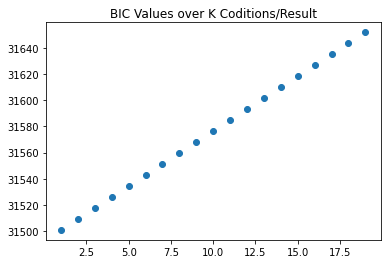

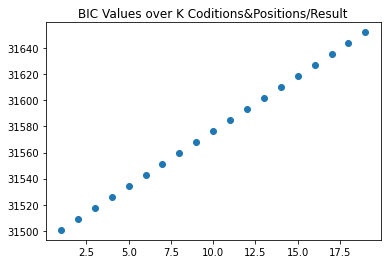

In [4]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from math import log

BIC, K = [], []
x = df['Condition_ good']
y = df['Result_Draw_Win']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
ssr = model.ssr
for i in range (1,20):
    BIC.append(4519*log(ssr)+i*log(4519))
    K.append(i)
plt.figure()
plt.scatter(K,BIC)
plt.title("BIC Values over K Coditions/Result")
plt.show

BIC, K = [], []
x = df[['Condition_ good', 'Position_ GK']]
y = df['Result_Draw_Win']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
ssr = model.ssr
for i in range (1,20):
    BIC.append(4519*log(ssr)+i*log(4519))
    K.append(i)
plt.figure()
plt.scatter(K,BIC)
plt.title("BIC Values over K Coditions&Positions/Result")
plt.show

It seems as if the most optimal way to run the regressions is linearly. That goes for both the purely conditions and for the conditions with regard to results. So, let’s see how linear regressions fair with regard to the data.

In [5]:
import numpy as np
import scipy
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

alpha = 0.03
listName, listRtN, listRsqr, listInpt, listSlp = [], [], [], [], []
for i in df.columns[28:33]:
    y = np.array(df[i].values.tolist())
    for j in df.columns[6:14]:
        x = np.array((df[j].values.tolist())).reshape((-1, 1))
        model = LinearRegression().fit(x, y)
        F = (f_regression(x,y, center=True))
        listName.append(i+', '+j) 
        listRsqr.append(str(model.score(x, y)))
        listInpt.append(str(model.intercept_))
        listSlp.append(str(model.coef_))
        if F[1] > alpha:
            listRtN.append('Fail to reject '+str(F[1]))
        else:
            listRtN.append('Rejected       '+str(F[1]))
print(tabulate({'Name': listName,'Null Rejected?': listRtN, 'Rsquared': listRsqr, 'Incercept': listInpt, 'Slope': listSlp}, headers="keys"))

Name                                 Null Rejected?                  Rsquared    Incercept  Slope
-----------------------------------  ---------------------------  -----------  -----------  -------------
Result_ Lose, Condition_ Mod         Fail to reject [0.16055845]  0.000435853     0.40886   [-0.01181164]
Result_ Lose, Condition_ good        Fail to reject [0.05288785]  0.000829382     0.391254  [-0.0282836]
Result_ Lose, Condition_ bad         Fail to reject [0.85825018]  7.06268e-06     0.378942  [0.00516358]
Result_ Lose, Condition_ blue        Fail to reject [0.76816924]  1.92381e-05     0.379812  [-0.00915584]
Result_ Lose, Condition_ green       Fail to reject [0.06816561]  0.000736284     0.365854  [0.02633723]
Result_ Lose, Condition_ orange      Fail to reject [0.04979014]  0.000851738     0.387817  [-0.03203942]
Result_ Lose, Condition_ purple      Fail to reject [0.24390978]  0.000300598     0.378463  [0.08665337]
Result_ Lose, Condition_ red         Fail to reject [0.805

As the data above indicates nothing was able to reject the null hypothesis that conditions play an insignificant roll in determining game results. Some results come closer, in general it would seem that of these trails when we look at conditions which are orange and good our p-values, that being our indicator of how likely we can reject the null, decreases making it more likely we can reject the null. This is also bolstered by the fact that both of these indicators tend to have the largest r-squared, or the largest significance in their trends. This isn't to say much though, given that nearly everything's chance of rejecting the null and ability to explain the trend is very bad. But the question is if we analyze this with regard to adding in the variable of conditions with respect to each position will certain positions show themselves to be affected by conditions?

In [6]:
from scipy import stats
listName, listRtN, listRsqr, listInpt, listSlp = [], [], [], [], []

for i in df.columns[30:33]:
    y = np.array(df[i].values.tolist())
    for j in df.columns[6:9]:
        for k in df.columns[15:27]:
            listtemp = []
            x = np.array(df[[j,k]].values.tolist())
            model = LinearRegression().fit(x, y)
            F = (f_regression(x,y, center=True))
            f = 1.0 - stats.chi2.cdf(-2.0 * (log(F[1][0]) + log(F[1][1])), 4) ##fisher's method for combining p-values
            listName.append(i+', '+j+', '+k)  
            listRsqr.append(str(model.score(x, y)))
            listInpt.append(str(model.intercept_))
            listSlp.append(str(model.coef_))
            if f > alpha:
                listRtN.append('Fail to reject '+str(f))
            else:
                listRtN.append('Rejected       '+str(f))
print(tabulate({'Name': listName,'Null Rejected?': listRtN, 'Rsquared': listRsqr, 'Incercept': listInpt, 'Slope': listSlp}, headers="keys"))

Name                                              Null Rejected?                         Rsquared    Incercept  Slope
------------------------------------------------  ----------------------------------  -----------  -----------  ---------------------------------
Result_Draw_Lose, Condition_ Mod, Position_ CB    Fail to reject 0.8424351321820746   7.48062e-05     0.630911  [-0.00479628 -0.00106094]
Result_Draw_Lose, Condition_ Mod, Position_ CF    Fail to reject 0.3233884919795732   0.000462338     0.625999  [-0.00402466  0.03571793]
Result_Draw_Lose, Condition_ Mod, Position_ CMF   Fail to reject 0.8714407865240759   7.48527e-05     0.630752  [-0.00487753  0.00109853]
Result_Draw_Lose, Condition_ Mod, Position_ DMF   Fail to reject 0.8470671637900621   7.81977e-05     0.631255  [-0.00486998 -0.0031376 ]
Result_Draw_Lose, Condition_ Mod, Position_ GK    Fail to reject 0.7723441990210272   0.000104908     0.631922  [-0.004969   -0.01031485]
Result_Draw_Lose, Condition_ Mod, Position_ LB

This time when observing the data, it becomes yet again clear how little impact conditions plays upon results. Again, not a null hypothesis is shown to be false, indicating that no position is adequately impacted by their respective condition. Again, the trend of orange conditions having the strongest impact bleeds through slightly, and it would seem that cmfs and cfs are the positions in which are most impacted. This isn't to say that they are impacted by any significant degree, but when compared to the other positions these two nearly reject the null when selecting for very binary data. Which is another thing to keep in mind, the less binary we make the data the lower the significance of any of the data points are. This indicates that even if the cf and cmf positions are more impacted its still unlikely that this is beyond statistical noise. To make this clear bellow I graph out the two respective cases where this can be seen in non-binary data, that being Result-Mod by Condition-Mod with respect to CMF and CF.
## Part 2 Conditions by team aggregate:
Our final look into the data will be looking at it on a team-by-team basis rather than the individual impact conditions can have on a player and/or its position. To do this we will reorganize the data into teams and their score lines. Then we will perform more regressions on the teams with respect to the number of each condition they have on their team, and then how that impacts goal differential (the number of goals score for or against a team) and their game's result.<br>
So first the data needs to be reorganized. This will be done by breaking the data down into the following:
### Data collecting
1. #, Cup and Group, Match, and Team
2. Number of players fielded, a linear increasing condition score, a ln condition score, and an exponential increasing score.
3. Lastly the results will be broken down into the results based upon win, draw, loss and by how much the team was ahead/behind by in goals.

In [7]:
from math import e
listA, listA0, listA1, listB, listC, listD, listE, listF, listG, listH, listI = [], [], [], [], [], [], [], [], [], [], []
def teamcondition(x,y,y1,y2): ##gives us #, linear, ln, and exp
    i = 0
    last = ' /an/'
    k = 0
    l = 0
    m = 0
    c = 0
    while i < 4519:
        if last == df['Team'][i]:
            last = df['Team'][i]
            if df['Condition_ Mod'][i] > 1:
                m += e**(df['Condition_ Mod'][i]-2)
            else:
                m += -e**(-1*df['Condition_ Mod'][i]+2)
            l += log(df['Condition_ Mod'][i]+1)/log(e)
            k += df['Condition_ Mod'][i]
            i += 1
            c += 1
        else:
            x.append(k)
            y.append(c)
            y1.append(l)
            y2.append(m)
            c = 0
            k = 0
            l = 0
            m = 0            
            last = df['Team'][i]
    x.append(k)
    y.append(c)
    y1.append(l)
    y2.append(m)
    c= 0
teamcondition(listA,listB,listA0,listA1)

def lookup(x,z): ##simplifying data from old dfs
    i = 0
    y = 0
    while i < len(listB):
        z.append(df[x][y])
        y += listB[i]
        i += 1
lookup('Team',listC)
lookup('#',listD)
lookup('Match',listE)
lookup('CupandGroup',listF)
lookup('Result_Mod',listG)
lookup('Score',listH)

def gd(x): ## first look at # to get where you are pulling data from, then look at results if 1 then return 0, if 0 then must be negative, if 2 then must be postive
    for i in range(0,len(listH)):
        if listG[i] == 1:
            x.append(0)
        elif listG[i] ==2:
            if int(listH[i][1]) - int(listH[i][3]) > 0:
                x.append(int(listH[i][1]) - int(listH[i][3]))
            else: 
                x.append(int(listH[i][3]) - int(listH[i][1]))
        else:
            if int(listH[i][1]) - int(listH[i][3]) < 0:
                x.append(int(listH[i][1]) - int(listH[i][3]))
            else: 
                x.append(int(listH[i][3]) - int(listH[i][1]))
gd(listI)

### Data manipulation
Now that the data has been reorganized its time to package the data into a new data frame.

In [8]:
data = {'#':  listD,
        'Cup and Group': listF,
        'Match': listE,
        'Team': listC,
        'Players Fielded': listB,
        'Codition Score Linear': listA,
        'Codition Score Exp': listA1,
        'Codition Score Ln': listA0,
        'Goal Difference': listI,
        'Result': listG,
        }

df1 = pd.DataFrame (data, columns = ['#','Cup and Group', 'Match', 'Team', 'Players Fielded', 'Codition Score Linear', 
                                     'Codition Score Ln', 'Codition Score Exp', 'Goal Difference', 'Result'])

df1['Linear/Fielded'] = df1['Codition Score Linear']/df1['Players Fielded']
df1['Ln/Fielded'] = df1['Codition Score Ln']/df1['Players Fielded']
df1['Exp/Fielded'] = df1['Codition Score Exp']/df1['Players Fielded']
df1 = df1[[c for c in df1 if c not in ['Goal Difference', 'Result']] + ['Goal Difference', 'Result']]
df1['Result_Draw_Win'] = df1.Result.map({2:1, 1:1, 0:0})
df1['Result_Draw_Lose'] = df1.Result.map({2:0, 1:1, 0:1})

df1

,#,Cup and Group,Match,Team,Players Fielded,Codition Score Linear,Codition Score Ln,Codition Score Exp,Linear/Fielded,Ln/Fielded,Exp/Fielded,Goal Difference,Result,Result_Draw_Win,Result_Draw_Lose
0,0,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /s4s/,/an/,12,28,14.269537,21.825620,2.333333,1.189128,1.818802,-2,0,0,1
1,12,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /s4s/,/s4s/,14,34,16.859804,28.214676,2.428571,1.204272,2.015334,2,2,1,0
2,26,2020 4chan Spring Babby Cup Qualifiers Group A,/y/ v /aco/,/y/,14,31,16.061297,20.107338,2.214286,1.147235,1.436238,-3,0,0,1
3,40,2020 4chan Spring Babby Cup Qualifiers Group A,/y/ v /aco/,/aco/,14,34,17.042126,27.262183,2.428571,1.217295,1.947299,3,2,1,0
4,54,2020 4chan Spring Babby Cup Qualifiers Group A,/an/ v /y/,/an/,12,28,14.334076,18.873127,2.333333,1.194506,1.572761,-3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,4449,2020 4chan Spring Babby Cup Group H,/ck/ v /m/,/m/,14,39,18.286921,44.711070,2.785714,1.306209,3.193648,1,2,1,0
319,4463,2020 4chan Spring Babby Cup Group H,/o/ v /ck/,/o/,14,36,17.552952,33.651240,2.571429,1.253782,2.403660,-3,0,0,1
320,4477,2020 4chan Spring Babby Cup Group H,/o/ v /ck/,/ck/,14,35,16.965165,30.885450,2.500000,1.211797,2.206104,3,2,1,0
321,4491,2020 4chan Spring Babby Cup Group H,/m/ v /tg/,/m/,14,33,16.636661,23.543902,2.357143,1.188333,1.681707,5,2,1,0


### Visualizing the data:
Before working with the data again it will be useful to look at the data within python and Tableau.

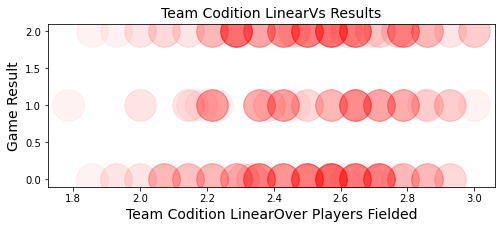

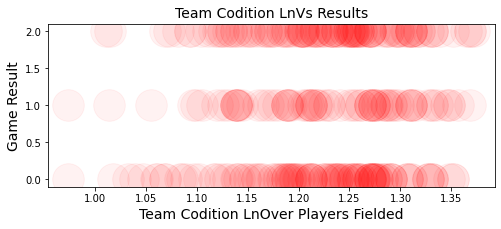

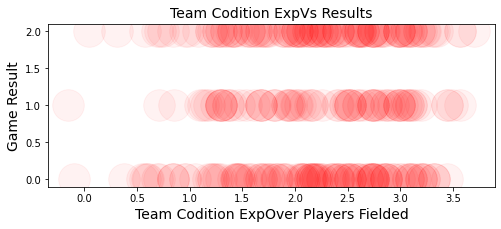

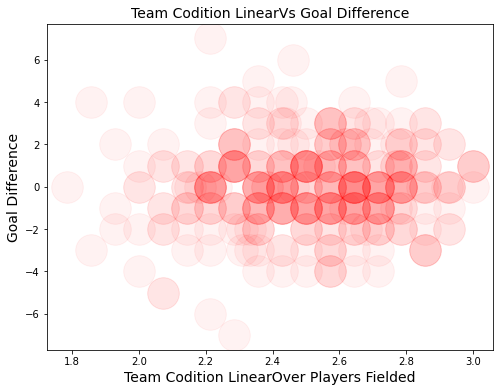

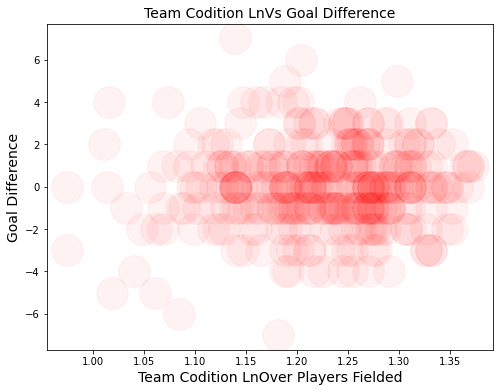

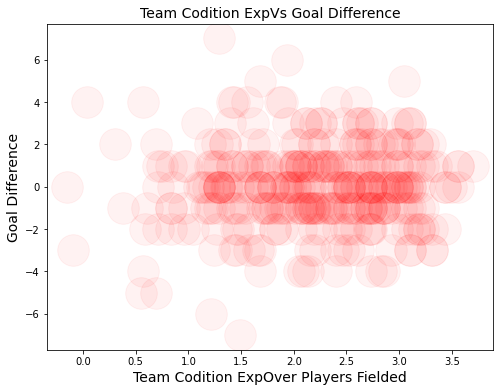

In [9]:
list3 = ['Linear', 'Ln', 'Exp']
for i in list3:
    plt.figure(figsize = (8,3))
    plt.scatter(df1['Codition Score '+ i]/df1['Players Fielded'], df1['Result'], color='red', alpha=.05, s = 1000)
    plt.title('Team Codition ' +i+ 'Vs Results', fontsize=14)
    plt.xlabel('Team Codition '+i+ 'Over Players Fielded', fontsize=14)
    plt.ylabel('Game Result', fontsize=14)
    plt.show()

for i in list3:
    plt.figure(figsize = (8,6))
    plt.scatter(df1['Codition Score '+i]/df1['Players Fielded'], df1['Goal Difference'], color='red', alpha=.05, s = 1000)
    plt.title('Team Codition '+i+'Vs Goal Difference', fontsize=14)
    plt.xlabel('Team Codition '+i+'Over Players Fielded', fontsize=14)
    plt.ylabel('Goal Difference', fontsize=14)
    plt.show()

The above data when looked at doesn't show an amazingly clear trend, there seems to be lower win results in GD and higher win rates in results overall but it seems as if due to the normally distribution of data it will be harder to get that out of the noise. Speaking of which lets get a graph of this with respect to totals.

In [12]:
df1.to_csv(d1, index = False)

![ResultsConditionTeam](https://cdn.discordapp.com/attachments/473644700583198721/848720031604408360/Data_Codition_Totals.png)

Similar to the data presented in the other Tableau graphics this graphic illustrates that similar to the graphic of the conditions for each individual player and by players broken down by position these graphs also seem to be right skewed. The possible exception to that may be the conditions Ln. However, the difference between the graphs for Exp and linear seem to share a bit in their trends, even though the graph for exp seems to be more evenly distributed whereas the graph for linear seems to have more variance in values. However, both have similar trends for their total values overall, with exp seeming to transfer its condition count from the ends more towards the center's ends.
### Regression analysis: 
Similar to the data observed in the case of conditions and conditions positions these graphics show us that it also may look like polynomials may be worthwhile using; however, like the other data it may not be the case. So first let’s begin by testing that.

<function matplotlib.pyplot.show(close=None, block=None)>

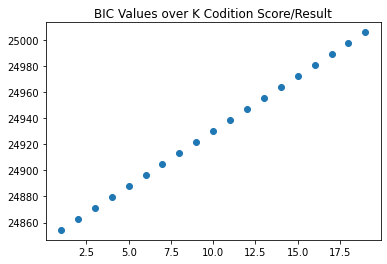

In [10]:
import statsmodels.api as sm

BIC, K = [], []
x = df1[['Linear/Fielded']]
y = df1['Result']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
ssr = model.ssr
for i in range (1,20):
    BIC.append(4519*log(ssr)+i*log(4519))
    K.append(i)
plt.figure()
plt.scatter(K,BIC)
plt.title("BIC Values over K Codition Score/Result")
plt.show

As show above, the most powerful way to explain the data is with the linear regression, so let’s start by observing the data with linear regressions. 

In [11]:
listName, listRtN, listRsqr, listInpt, listSlp = [], [], [], [], []

for i in df1.columns[11:15]:
    y = np.array(df1[i].values.tolist())
    for j in df1.columns[5:11]:
        x = np.array((df1[j].values.tolist())).reshape((-1, 1))
        model = LinearRegression().fit(x, y)
        F = (f_regression(x,y, center=True))
        listName.append(i+', '+j) 
        listRsqr.append(str(model.score(x, y)))
        listInpt.append(str(model.intercept_))
        listSlp.append(str(model.coef_))
        if F[1] > alpha:
            listRtN.append('Fail to reject '+str(F[1]))
        else:
            listRtN.append('Rejected       '+str(F[1]))
print(tabulate({'Name': listName,'Null Rejected?': listRtN, 'Rsquared': listRsqr, 'Incercept': listInpt, 'Slope': listSlp}, headers="keys"))

Name                                     Null Rejected?                  Rsquared    Incercept  Slope
---------------------------------------  ---------------------------  -----------  -----------  -------------
Goal Difference, Codition Score Linear   Fail to reject [0.57080626]  0.0010021     -0.475115   [0.0136523]
Goal Difference, Codition Score Ln       Fail to reject [0.55425653]  0.00109066    -0.606231   [0.03565037]
Goal Difference, Codition Score Exp      Fail to reject [0.55178912]  0.00110429    -0.177027   [0.00594147]
Goal Difference, Linear/Fielded          Fail to reject [0.39978796]  0.00220961    -0.941244   [0.37721436]
Goal Difference, Ln/Fielded              Fail to reject [0.29387216]  0.00343183    -1.80482    [1.4799726]
Goal Difference, Exp/Fielded             Fail to reject [0.4793757]   0.00155973    -0.21832    [0.10223588]
Result, Codition Score Linear            Fail to reject [0.62540386]  0.000743389    0.814776   [0.00519952]
Result, Codition Score Ln  

These are the results for team scores in conditions. As evident, it’s much more effective to control for players fielded and similar to the results observed within the regressions of individual player conditions the much more powerful regressions seem to be those observing results and draws compared to results of loses. However, none of the data passes the confidence interval at 97% and in fact comes out to be much smaller than a significant portion observed within individual players.
## **Conclusion:**
Across the large amount of data looked at we can come to the following conclusion.
1. It’s unlikely that player conditions have impact on the result of a game to a significant margin. It may be the case that they have a tinny impact when in orange condition, but if they do it’s so small it’s almost entirely drowned out by statically noise.
2. Player conditions do not seem to have a significant role on players of differing positions. It may be the case that they impact CMFs and CFs but similar to the orange conditions it is unlikely to impact the game beyond statistical noise. 
3. A team's total conditions are unlikely to impact the team's results when using the random condition setting. It is more likely that rolling a CMF or having a single orange player on the team will impact the game rather than rolling several orange condition players.
Thus, it is much more likely that the major impacts of a game of PES 2019 when simulated are much more impacted by other variables not considered, such as:<br>
What sliders the team is using, how the team was constructed, whether the team is green or red for its height distribution, the team's formation, ect. This is not to say that conditions do not have a roll or that when one is to use a non-random condition team the team will not be in a better situation, but that is to say that its unlikely conditions play a significant impact on the can be visibly seen.